In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

In [3]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")
conn.commit()

In [4]:
cursor.executemany("""
INSERT INTO sales (product, quantity, price)
VALUES (?, ?, ?)
""", [
    ("Laptop", 5, 50000),
    ("Mobile", 10, 20000),
    ("Headphones", 15, 1500),
    ("Tablet", 7, 30000),
    ("Mobile", 5, 20000),
    ("Laptop", 3, 50000)
])

conn.commit()

In [5]:
query = """
SELECT 
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

df = pd.read_sql_query(query, conn)

In [6]:
print(df)

      product  total_qty   revenue
0  Headphones         15   22500.0
1      Laptop          8  400000.0
2      Mobile         15  300000.0
3      Tablet          7  210000.0


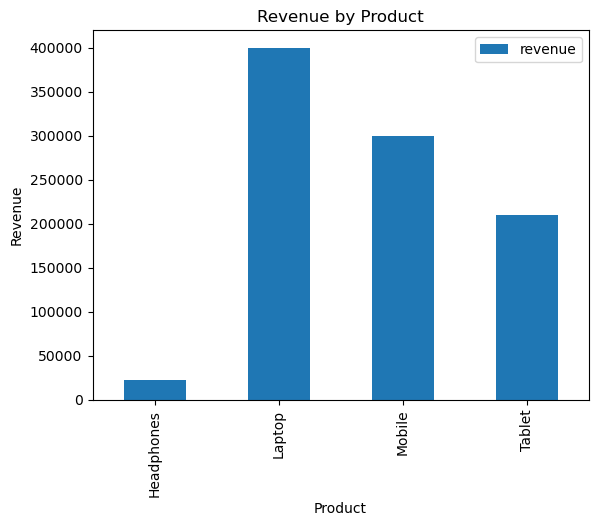

In [7]:
df.plot(kind='bar', x='product', y='revenue')
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.show()

In [8]:
plt.savefig("sales_chart.png")

<Figure size 640x480 with 0 Axes>

In [9]:
conn.close()